In [2]:
pip install svgpathtools numpy matplotlib scipy


Note: you may need to restart the kernel to use updated packages.


C:\Users\Anurag\AppData\Local\Temp\ipykernel_10688\999386024.py:10: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spline = UnivariateSpline(x, y, s=0.5)


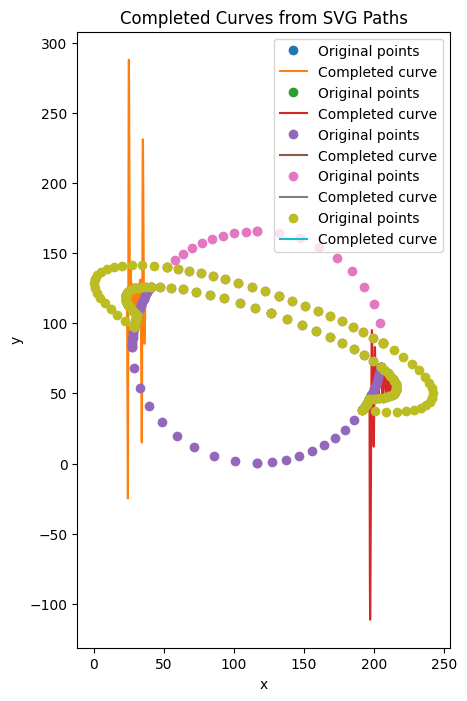

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths, parse_path
from svgpathtools import Line, CubicBezier, QuadraticBezier
from scipy.interpolate import UnivariateSpline

def interpolate_curve(x, y):
    """Interpolate missing parts of a curve using UnivariateSpline."""
    try:
        spline = UnivariateSpline(x, y, s=0.5)
        x_fit = np.linspace(x.min(), x.max(), 1000)
        y_fit = spline(x_fit)
        return x_fit, y_fit
    except Exception as e:
        print(f"Error during interpolation: {e}")
        return x, y

def extract_points_from_path(path):
    """Extract points from an SVG path."""
    x = []
    y = []
    for segment in path:
        if isinstance(segment, Line):
            x.extend([segment.start.real, segment.end.real])
            y.extend([segment.start.imag, segment.end.imag])
        elif isinstance(segment, CubicBezier):
            # Sample points for cubic Bezier curve
            for t in np.linspace(0, 1, 10):
                point = segment.point(t)
                x.append(point.real)
                y.append(point.imag)
        elif isinstance(segment, QuadraticBezier):
            # Sample points for quadratic Bezier curve
            for t in np.linspace(0, 1, 10):
                point = segment.point(t)
                x.append(point.real)
                y.append(point.imag)
    return np.array(x), np.array(y)

def process_svg(image_path):
    # Load SVG paths
    paths, attributes = svg2paths(image_path)
    
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Iterate over all paths in the SVG
    for path in paths:
        x, y = extract_points_from_path(path)
        
        # Sort points based on x-coordinate
        sorted_indices = np.argsort(x)
        x = x[sorted_indices]
        y = y[sorted_indices]
        
        # Interpolate and complete the curve
        x_fit, y_fit = interpolate_curve(x, y)
        
        # Plot the original and completed curves
        ax.plot(x, y, 'o', label='Original points')
        ax.plot(x_fit, y_fit, '-', label='Completed curve')

    ax.legend()
    ax.set_aspect('equal')
    plt.title('Completed Curves from SVG Paths')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Main function
if __name__ == "__main__":
    svg_path = "occlusion2.svg"  # Replace with your SVG file path
    process_svg(svg_path)
